In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.datasets import make_blobs

# Carga de datos

In [0]:
def grafica(X,y):
  sns.set_style("darkgrid")
  plt.figure(figsize=(8,6))
  plt.scatter(X[:,0],X[:,1],c=y,cmap='cividis')
  plt.show()

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=12, cluster_std=1)
grafica(X,y)

In [0]:
y1, y2, y3 = [], [], []
for i in y:
    if i == 0:
        y1.append(1)
        y2.append(0)
        y3.append(0)
    elif i == 1:
        y1.append(0)
        y2.append(1)
        y3.append(0)
    elif i == 2:
        y1.append(0)
        y2.append(0)
        y3.append(1)
y = np.array([y1,y2,y3]).T
y

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

Dividimos el conjunto de entrenamiento y de test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) 

## Normalización

In [0]:
scaler = StandardScaler().fit(X_train)

X_train_normed = scaler.transform(X_train)
X_test_normed = scaler.transform(X_test) 

# Modelo

In [0]:
model = keras.Sequential()
model.add(layers.Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


# Entrenamiento

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100
early_stop = keras.callbacks.EarlyStopping(monitor='accuracy',verbose=2,patience=10)                 
history = model.fit(X_train_normed,y_train,epochs=EPOCHS,verbose=0,callbacks=[early_stop])

Epoch 00027: early stopping


In [0]:
score = model.evaluate(X_test_normed,y_test,verbose=0)
print('Loss:',score[0],'\nAccuracy:',score[1])

Loss: 0.09771585464477539 
Accuracy: 0.9766666889190674


# Predicción

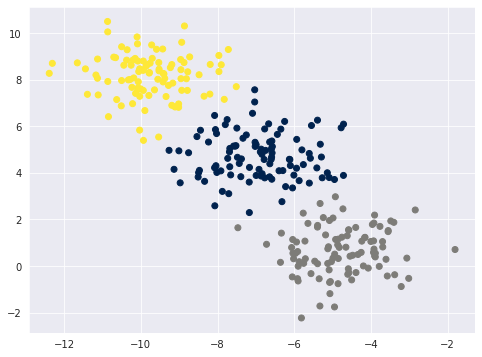

In [0]:
y_pred = np.argmax(model.predict(X_test_normed), axis=-1)
grafica(X_test,y_pred)

# Automatización

In [0]:
def build_model(neuronas,i):
    model = keras.Sequential(layers.Dense(neuronas, activation='relu', input_dim=X_train.shape[1]))
    for k in range(i-1):
        model.add(layers.Dense(2**p, activation="relu"))
    model.add(layers.Dense(y_train.shape[1],activation='softmax'))

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    
    return model

p1 = 3
p2 = 9
EPOCHS = 100
l_neuronas_totales = []
l_neuronas = []
l_capas = []
l_loss = []
l_accuracy = []
l_tiempo = []
l_parametros = []
l_prop = []
l_epocas = []

for p in range(p1,p2+1):
    i = 1
    while p > 0:
        model = build_model(2**p,i)
        #model.summary()

        # Entrenamiento
        # Tomamos el tiempo de entrenamiento
        start_time = time()
        # Early stop
        early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
        history = model.fit(X_train_normed,y_train,epochs=EPOCHS,verbose=0,callbacks=[early_stop])
        time_ex = time() - start_time

        print('Capas:',i,'\nNeuronas x Capa:',2**p,'\nEpocas:',len(history.epoch))
        score = model.evaluate(X_test_normed, y_test,verbose=0)
        print('Loss:',score[0],'\nAccuracy:',score[1])
        print('---------------------------------------')
        # Agregamos datos del entrenamiento

        l_neuronas.append(2**p)
        l_capas.append(i)
        l_neuronas_totales.append(i*(2**p))
        l_parametros.append(model.count_params())
        l_loss.append(score[0])
        l_accuracy.append(score[1])
        l_tiempo.append(time_ex)
        l_prop.append(model.count_params()/X_train.shape[0])
        l_epocas.append(len(history.epoch))

        i = 2*i
        p = p-1

Capas: 1 
Neuronas x Capa: 8 
Epocas: 47
Loss: 0.11826497316360474 
Accuracy: 0.9800000190734863
---------------------------------------
Capas: 2 
Neuronas x Capa: 4 
Epocas: 46
Loss: 0.5786721110343933 
Accuracy: 0.7133333086967468
---------------------------------------
Capas: 4 
Neuronas x Capa: 2 
Epocas: 100
Loss: 0.28474822640419006 
Accuracy: 0.95333331823349
---------------------------------------
Capas: 1 
Neuronas x Capa: 16 
Epocas: 44
Loss: 0.10540218651294708 
Accuracy: 0.9800000190734863
---------------------------------------
Capas: 2 
Neuronas x Capa: 8 
Epocas: 42
Loss: 0.059704527258872986 
Accuracy: 0.9766666889190674
---------------------------------------
Capas: 4 
Neuronas x Capa: 4 
Epocas: 52
Loss: 0.07513534277677536 
Accuracy: 0.9766666889190674
---------------------------------------
Capas: 8 
Neuronas x Capa: 2 
Epocas: 21
Loss: 1.0986299514770508 
Accuracy: 0.33000001311302185
---------------------------------------
Capas: 1 
Neuronas x Capa: 32 
Epocas: 54

In [0]:
df = pd.DataFrame({'Neuronas':l_neuronas_totales,
                   'Neuronas x Capa':l_neuronas,
                   'Capas':l_capas,
                   'Parametros':l_parametros,
                   'PAR/TRAIN':l_prop,
                   'Loss':l_loss,
                   'Accuracy':l_accuracy,
                   'Tiempo':l_tiempo,
                   'Epocas':l_epocas})
df.to_excel('data_model_multiclass_classification.xlsx',index=False)
df.head()

,Neuronas,Neuronas x Capa,Capas,Parametros,PAR/TRAIN,Loss,Accuracy,Tiempo,Epocas
0,8,8,1,51,0.072857,0.118265,0.980000,1.077320,47
1,8,4,2,47,0.067143,0.578672,0.713333,1.100792,46
2,8,2,4,33,0.047143,0.284748,0.953333,2.553272,100
3,16,16,1,99,0.141429,0.105402,0.980000,1.038971,44
4,16,8,2,123,0.175714,0.059705,0.976667,1.006585,42
